In [1]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np

# Задание 1

В ящике находится 15 качественных и 5 бракованных деталей. Наудачу извлекаются 2 детали. 
Найти вероятность того, что:
  * a) обе детали будут качественными; 
  * б) одна деталь будет качественной, а одна –бракованной; 
  * в) обе детали бракованны.

Общее количество способов извлечь две детали $$N=C_{20}^{2}.$$

По правилу умножения:
  * число способов выбрать две качественые детали будет равно произведению числа способов выбрать 2 из 15 качественных и 0 из 5 бракованных, т.е. $$k_{good}=C_{15}^2 \cdot C_{5}^0.$$
  * число способов выбрать одну качественую и одну бракованную будет равно произведению числа способов выбрать 1 из 15 качественных и 1 из 5 бракованных, т.е. $$k_{goodbad}=C_{15}^1 \cdot C_{5}^1.$$
  * число способов выбрать две бракованные будет равно произведению числа способов выбрать 0 из 15 качественных и 2 из 5 бракованных, т.е. $$k_{bad}=C_{15}^0 \cdot C_{5}^2.$$

In [5]:
import math
def calc_p(good_count, bad_count, extracted_good, extracted_bad):
    # общее количество деталей
    total_count = good_count + bad_count
    # количество извлекаемых деталей
    extracted_count = extracted_good + extracted_bad
    # всего возможных способов достать детали
    n = math.comb(total_count, extracted_count)
    # вероятность достать заданное количество качественных и бракованных
    p = math.comb(good_count,extracted_good) * math.comb(bad_count,extracted_bad) / n
    return p

print(f"Вероятность, что обе будут качественные: {calc_p(15, 5, 2, 0)}")
print(f"Вероятность, что одна будет качественная, а одна бракованная: {calc_p(15, 5, 1, 1)}")
print(f"Вероятность, что обе будут бракованные: {calc_p(15, 5, 0, 2)}")

Вероятность, что обе будут качественные: 0.5526315789473685
Вероятность, что одна будет качественная, а одна бракованная: 0.39473684210526316
Вероятность, что обе будут бракованные: 0.05263157894736842


# Задание 2.

При рентгеновском обследовании вероятность обнаружить заболевание туберкулезом у больного туберкулезом равна 0.9, 
вероятность принять здорового человека за больного равна 0.01.

Доля больных туберкулезом по отношению ко всему населению равна 0.001. 

Найти вероятность того, что человек здоров, если он был признан больным при обследовании.

Подсказка: использовать формулу Байеса:событие A–обследование показало наличие туберкулеза,В1–человек здоров, В2 –человек болен.

In [8]:
# Исходные данные

#доля больных туберкулезом
proportion_sick = 0.001
# доля здоровых 
proportion_healty = 1 - proportion_sick
# Вероятность ложноположительного результата теста - 0.01
p_false_positiv = 0.01
# Надежность теста (способность найти болезнь при её наличии)
reliability = 0.9

Событие А = рентген нашел заболевание \
Гипотеза-1 (H1) - человек здоров \
Гипотеза-2 (H2) - человек болен

Нужно найти $P(H_{1}|A)=P(H_{1})*P(A|H_{1}) / P(A)$

In [10]:
# вероятность гипотезы H1 (что проверяли здорового человека)
p_H1 = proportion_healty
# вероятность гипотезы H2 (что проверяли больного человека)
p_H2 = proportion_sick
# вероятность того, что заболевание обнаружено при условии, что человек реально здоров
p_A_H1 = p_false_positiv
# вероятность того, что у него обнаружено заболевание, при условии, что человек реально болен p(A|H2)
p_A_H2 = reliability
# полная верояность события А: P(A) = P(H1)*P(A|H1) + P(H2)*P(A|H2)
p_A = (p_H1 * p_A_H1) + (p_H2 * p_A_H2)

# вероятность P(H1|A)
p_H1_A = p_H1 * p_A_H1 / p_A
print(f'Вероятность того, что человек здоров, хотя тест выявил заболевание: {p_H1_A}')

Вероятность того, что человек здоров, хотя тест выявил заболевание: 0.9173553719008265


# Задание 3.

Известно, что случайная величина «время до наступления отказа исследуемых изделий подчиняется 
логнормальному распределению (lognorm)с параметрами loc=0, scale=5, s=0.5.

Требуется построить графики функции плотности и функции распределения, найти математическое ожидание, дисперсию и время безотказной работы с вероятностью 0.9(квантиль уровня 0.1)

In [13]:
loc=0
scale=5
s=0.5
lognorm_dist = lognorm(loc=loc, scale=scale, s=s)
# генерируем отсортированный по значению набор данных, соответствующий распределению
x = np.linspace(lognorm_dist.ppf(0.001), lognorm_dist.ppf(0.999), 1000)

In [14]:
# второй вариант генерации случайной выборки
# набор данных получается неотсортированный
x1 = lognorm_dist.rvs(size=1000)

In [15]:
#x

In [16]:
#x1

### График плотности

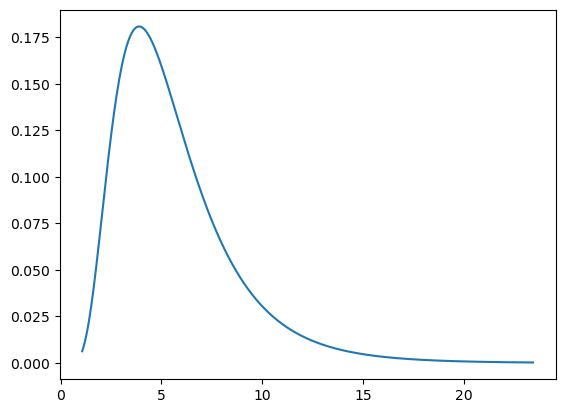

In [18]:
plt.plot(x, lognorm_dist.pdf(x), label='lognorm pdf x')

<BarContainer object of 1000 artists>

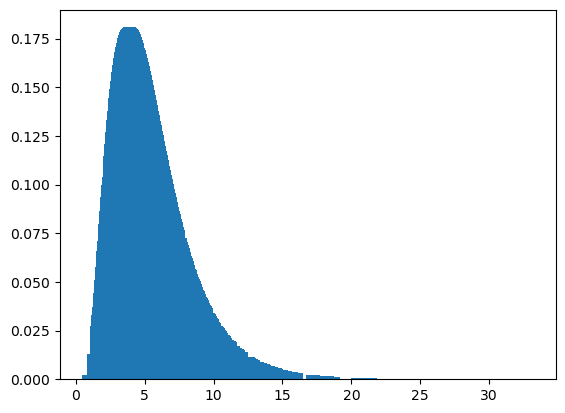

In [19]:
plt.bar(x1, lognorm_dist.pdf(x1), label='lognorm pdf x1')

### График распределения

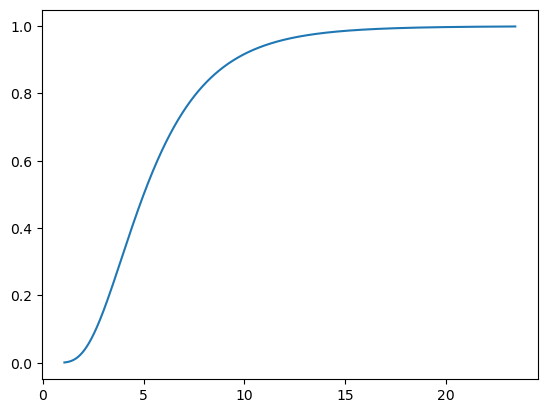

In [21]:
plt.plot(x, lognorm_dist.cdf(x), label='lognorm cdf')

<BarContainer object of 1000 artists>

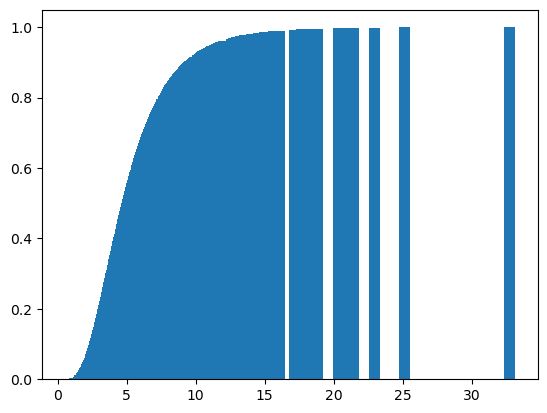

In [22]:
plt.bar(x1, lognorm_dist.cdf(x1), label='lognorm cdf')

### Матожидание

In [24]:
lognorm_dist.mean()

5.665742265334131

### Дисперсия

In [26]:
lognorm_dist.var()

9.117396350309663

### Время безотказной работы с вероятностью 0.9(квантиль уровня 0.1)

In [28]:
lognorm_dist.ppf(0.1)

2.6344175914801826